<a href="https://colab.research.google.com/github/RodericGuigoCorominas/PIC-Math-Workshop-on-Data-Science-2022/blob/main/Visualization_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import requests
import h5py
import numpy as np
import matplotlib.pylab as py
import matplotlib.pyplot as plt

In [2]:
def download(url: str, output_path: str, mode: str = "wb") -> None:
    res: requests.Response = requests.get(url)
    if res.status_code != 200:
        raise ValueError(f"download of {url} failed with status code {res.status_code}")
    with open(output_path, mode=mode) as fp:
        fp.write(res.content)


download(
    url="https://raw.githubusercontent.com/rcpaffenroth/PIC-Math-Workshop-on-Data-Science-2022/main/data/cs3data1.h5",
    output_path="./cs3data1.h5",
)
download(
    url="https://raw.githubusercontent.com/rcpaffenroth/PIC-Math-Workshop-on-Data-Science-2022/main/data/cs3data2.h5",
    output_path="./cs3data2.h5",
)
arrays={}

# grab the data from the file
filepath = ['cs3data1.h5']
numfiles = len(filepath)
f = 0
for i in range(numfiles):
    f = h5py.File(filepath[i], 'r')
    for k, v in f.items():
        arrays[k] = v

# display what data we have
for key in arrays.keys():
    print(key, arrays[key])

duct_height_save <HDF5 dataset "duct_height_save": shape (1, 1), type "<f8">
field_H_imag_save <HDF5 dataset "field_H_imag_save": shape (1201, 40), type "<f8">
field_H_real_save <HDF5 dataset "field_H_real_save": shape (1201, 40), type "<f8">
field_V_imag_save <HDF5 dataset "field_V_imag_save": shape (1201, 40), type "<f8">
field_V_real_save <HDF5 dataset "field_V_real_save": shape (1201, 40), type "<f8">
range_grid <HDF5 dataset "range_grid": shape (1201, 1), type "<f8">


In [43]:
data_h_mod = np.sqrt(np.square(np.array(arrays['field_H_real_save'])) + np.square(np.array(arrays['field_H_imag_save'])))
data_h_arg = np.arctan(np.array(arrays['field_H_imag_save']) / np.array(arrays['field_H_real_save']))

data_v_mod = np.sqrt(np.square(np.array(arrays['field_V_real_save'])) + np.square(np.array(arrays['field_V_imag_save'])))
data_v_arg = np.arctan(np.array(arrays['field_V_imag_save']) / np.array(arrays['field_V_real_save']))

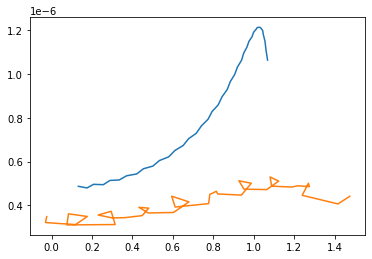

In [44]:
plt.plot(data_h_arg[10], data_h_mod[10])
plt.plot(data_v_arg[10], data_v_mod[10])

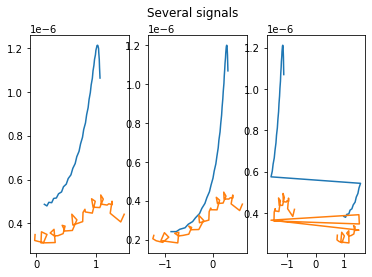

In [54]:
fig, (s1, s2, s3) = plt.subplots(1, 3)
fig.suptitle('Several signals')
s1.plot(data_h_arg[10], data_h_mod[10])
s1.plot(data_v_arg[10], data_v_mod[10])
s2.plot(data_h_arg[60], data_h_mod[60])
s2.plot(data_v_arg[60], data_v_mod[60])
s3.plot(data_h_arg[30], data_h_mod[30])
s3.plot(data_v_arg[30], data_v_mod[30])

<img src="https://raw.githubusercontent.com/RodericGuigoCorominas/PIC-Math-Workshop-on-Data-Science-2022/main/Rising_circular.gif" width="300" align="center">
